In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
from statsmodels.graphics.gofplots import qqplot

In [9]:
heart_disease = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [10]:
heart_disease.shape

(1190, 12)

In [11]:
heart_disease.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [12]:
heart_disease.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [13]:
heart_disease['target'].value_counts()
#1 : heart disease, 0: normal

1    629
0    561
Name: target, dtype: int64

In [14]:
heart_disease.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [15]:
heart_disease.groupby('target').mean()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
target,,,,,,,,,,,
0,51.124777,0.623886,2.777184,129.793226,231.657754,0.119430,0.631016,150.894831,0.139037,0.464706,1.297683
1,56.034976,0.888712,3.639110,134.259141,191.372019,0.297297,0.758347,129.777424,0.608903,1.331320,1.915739


In [16]:
#Correlation matrix
heart_disease.corr()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


In [17]:
def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(heart_disease.groupby('target')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    disease_positive = heart_disease[heart_disease['target']==1][feature]
    disease_negative = heart_disease[heart_disease['target']==0][feature]
    tstat, pval = stats.ttest_ind(disease_positive, disease_negative, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [18]:
features = list(heart_disease.columns)
features.remove('target')
features

['age',
 'sex',
 'chest pain type',
 'resting bp s',
 'cholesterol',
 'fasting blood sugar',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'ST slope']

In [19]:
# Look at the distribution of each feature at each level of the target variable
for feature in features:
    describe_cont_feature(feature)


*** Results for age ***
        count       mean       std   min   25%   50%   75%   max
target                                                          
0       561.0  51.124777  9.493914  28.0  44.0  51.0  57.0  76.0
1       629.0  56.034976  8.605215  31.0  51.0  57.0  62.0  77.0
t-statistic: 9.3, p-value: 6.61e-20
None

*** Results for sex ***
        count      mean       std  min  25%  50%  75%  max
target                                                    
0       561.0  0.623886  0.484842  0.0  0.0  1.0  1.0  1.0
1       629.0  0.888712  0.314738  0.0  1.0  1.0  1.0  1.0
t-statistic: 11.0, p-value: 1.09e-26
None

*** Results for chest pain type ***
        count      mean       std  min  25%  50%  75%  max
target                                                    
0       561.0  2.777184  0.909423  1.0  2.0  3.0  4.0  4.0
1       629.0  3.639110  0.754053  1.0  4.0  4.0  4.0  4.0
t-statistic: 17.7, p-value: 1.13e-61
None

*** Results for resting bp s ***
        count        m

## Plot continous features

In [20]:
# Plot overlaid histograms for continuous features
non_continous_features = ['sex', 'chest pain type','fasting blood sugar','resting ecg','exercise angina','ST slope']
continous_features = features
for feature in non_continous_features:
    continous_features.remove(feature)
print(continous_features)

['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']


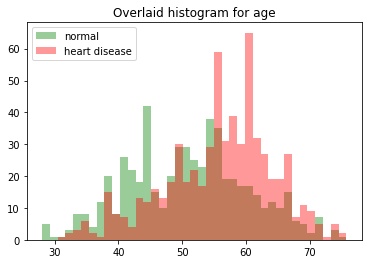

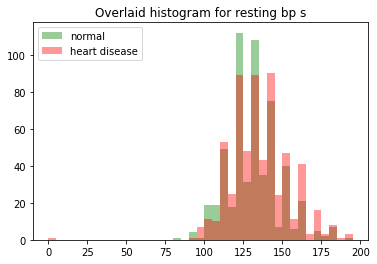

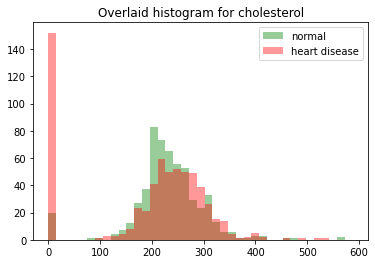

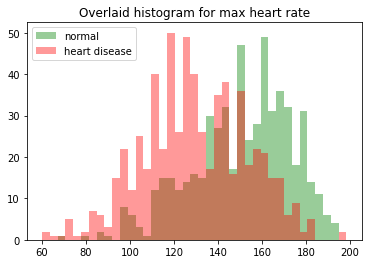

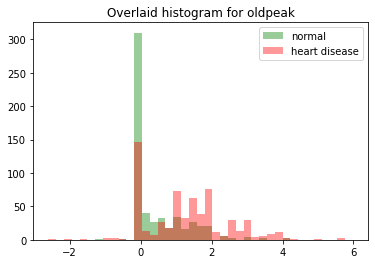

In [21]:
import warnings
warnings.filterwarnings("ignore")
for i in continous_features:
    normal = list(heart_disease[heart_disease['target'] == 0][i].dropna())
    disease = list(heart_disease[heart_disease['target'] == 1][i].dropna())
    xmin = min(min(normal), min(disease))
    xmax = max(max(normal), max(disease))
    width = (xmax - xmin) / 40
    sns.distplot(normal, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(disease, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['normal', 'heart disease'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

## Plot categorical features 

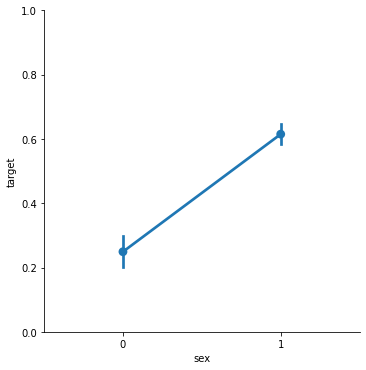

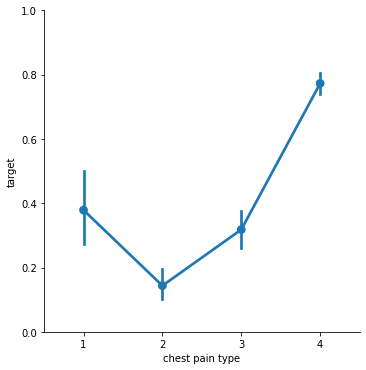

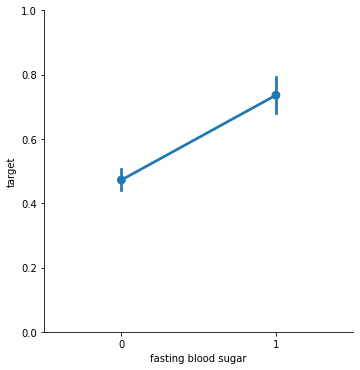

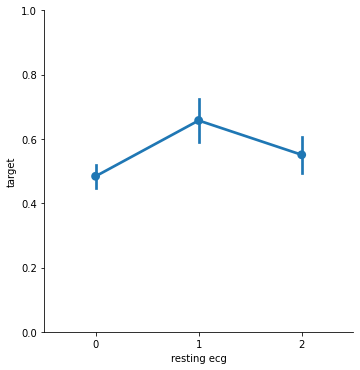

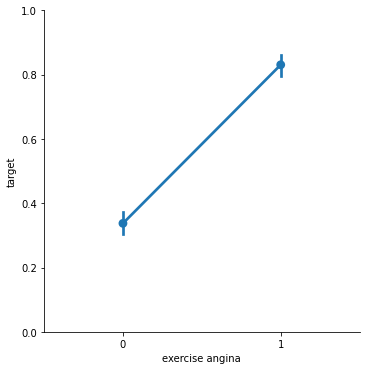

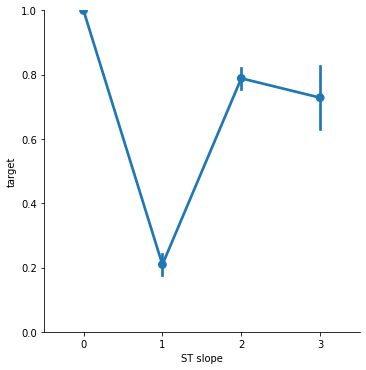

In [22]:
# Generate categorical plots for ordinal features
for col in non_continous_features:
    sns.catplot(x=col, y='target', data=heart_disease, kind='point', aspect=1, )
    plt.ylim(0, 1)

In [23]:
for col in non_continous_features:
    heart_disease_copy = heart_disease.filter(['target',col], axis=1)
    #heart_disease_copy = heart_disease['target', col]
    
    print(heart_disease_copy.groupby(col).mean())

       target
sex          
0    0.249110
1    0.614961
                   target
chest pain type          
1                0.378788
2                0.143519
3                0.318021
4                0.772800
                       target
fasting blood sugar          
0                    0.472222
1                    0.736220
               target
resting ecg          
0            0.483918
1            0.657459
2            0.550769
                   target
exercise angina          
0                0.337449
1                0.830803
            target
ST slope          
0         1.000000
1         0.209125
2         0.788660
3         0.728395


## Detect and clean outliers 

In [24]:
def detect_outlier(feature):
    outliers = []
    data = heart_disease[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))

In [25]:
for feature in continous_features:
    detect_outlier(feature)


Outlier caps for age:
  --95p: 68.0 / 57 values exceed that
  --3sd: 81.8 / 0 values exceed that
  --99p: 74.0 / 9 values exceed that

Outlier caps for resting bp s:
  --95p: 160.0 / 55 values exceed that
  --3sd: 187.2 / 10 values exceed that
  --99p: 180.0 / 10 values exceed that

Outlier caps for cholesterol:
  --95p: 330.0 / 58 values exceed that
  --3sd: 514.5 / 5 values exceed that
  --99p: 409.3 / 12 values exceed that

Outlier caps for max heart rate:
  --95p: 179.0 / 56 values exceed that
  --3sd: 216.3 / 2 values exceed that
  --99p: 188.0 / 11 values exceed that

Outlier caps for oldpeak:
  --95p: 3.0 / 45 values exceed that
  --3sd: 4.2 / 11 values exceed that
  --99p: 4.0 / 10 values exceed that


In [26]:
heart_disease.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [27]:
# Cap features
heart_disease['age'].clip(upper=heart_disease['age'].quantile(.99), inplace=True)
heart_disease['resting bp s'].clip(upper=heart_disease['resting bp s'].quantile(.99), inplace=True)
heart_disease['cholesterol'].clip(upper=heart_disease['cholesterol'].quantile(.99), inplace=True)
heart_disease['max heart rate'].clip(upper=heart_disease['max heart rate'].quantile(.99), inplace=True)
heart_disease['oldpeak'].clip(upper=heart_disease['oldpeak'].quantile(.99), inplace=True)

In [28]:
heart_disease.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.705042,0.763866,3.232773,132.028571,209.527697,0.213445,0.698319,139.675630,0.387395,0.914538,1.624370,0.528571
std,9.323432,0.424884,0.935480,17.980342,99.223647,0.409912,0.870359,25.399132,0.487360,1.056303,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,74.000000,1.000000,4.000000,180.000000,409.330000,1.000000,2.000000,188.000000,1.000000,4.000000,3.000000,1.000000


## Transform Skewed Features

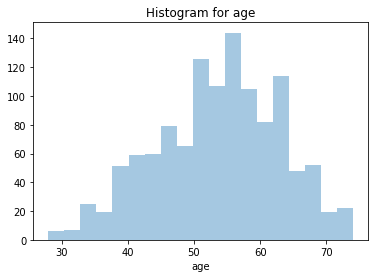

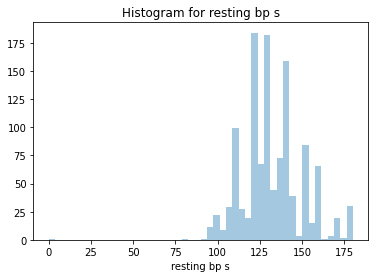

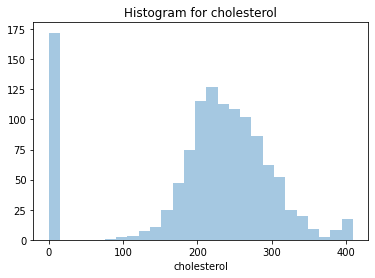

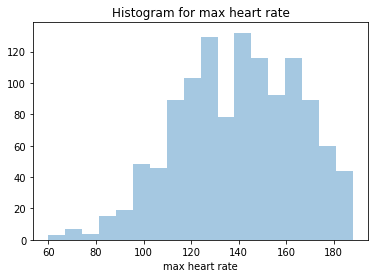

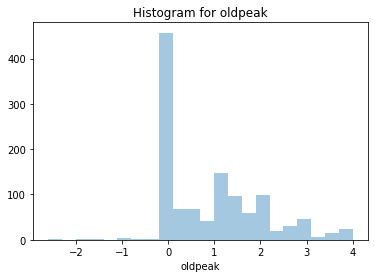

In [29]:
for feature in continous_features:
    sns.distplot(heart_disease[feature], kde=False)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

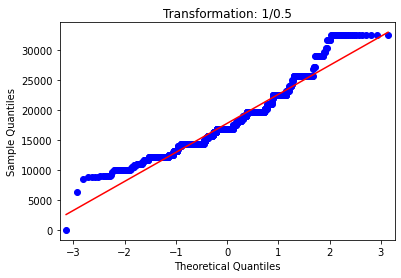

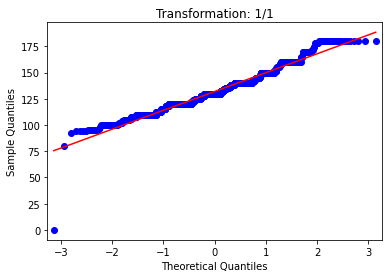

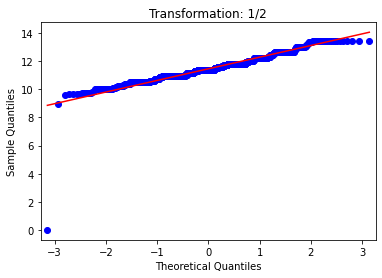

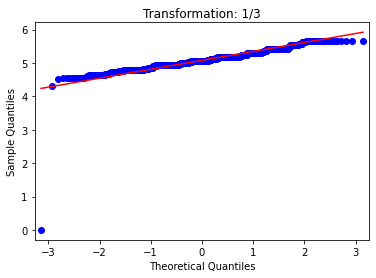

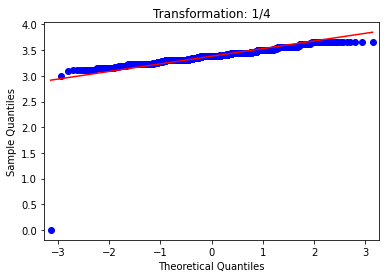

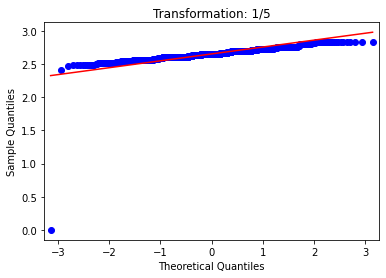

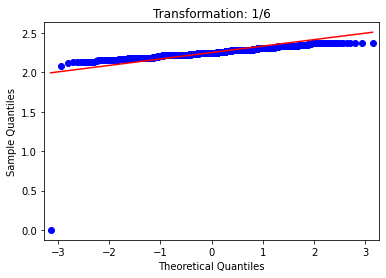

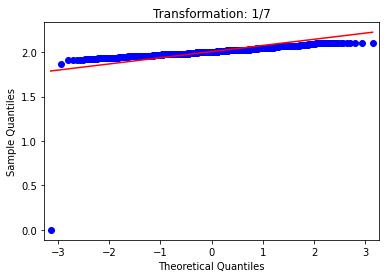

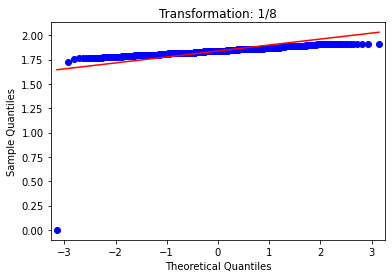

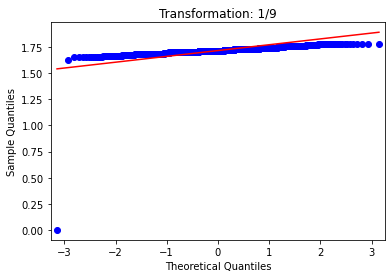

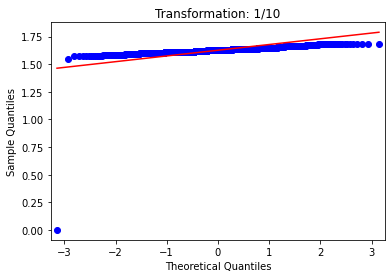

In [30]:
# Generate QQ plots
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = heart_disease['resting bp s']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

#1/2

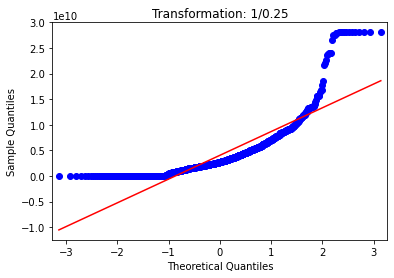

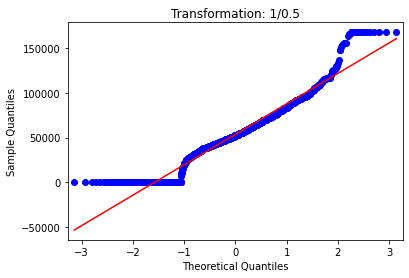

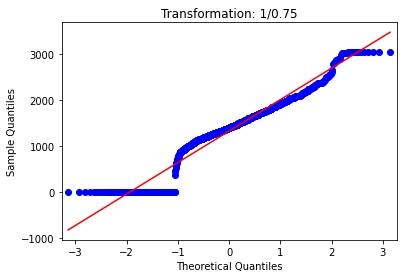

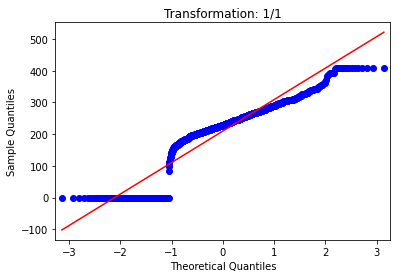

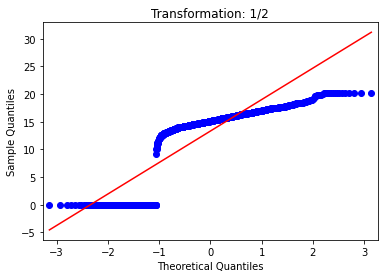

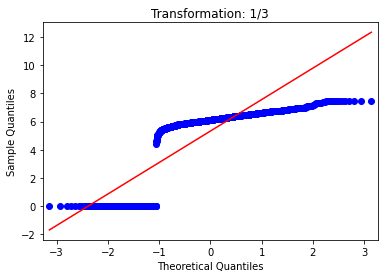

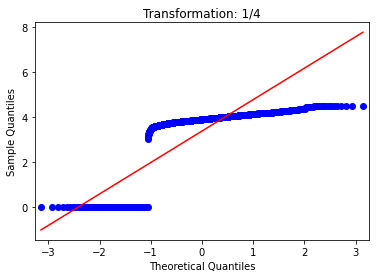

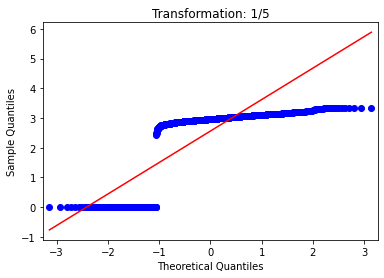

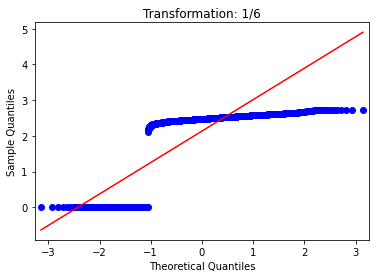

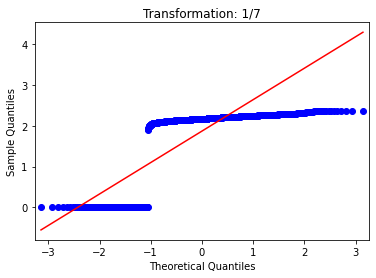

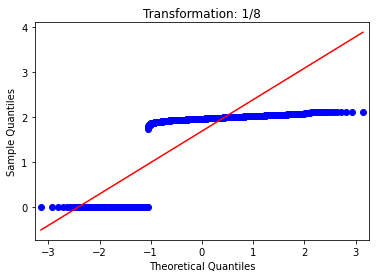

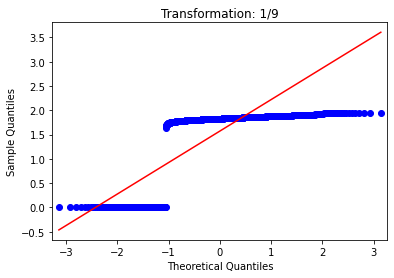

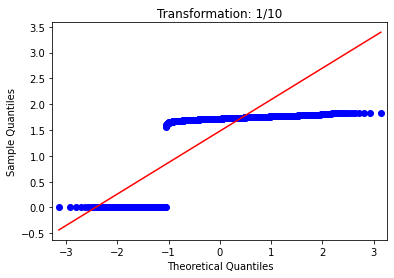

In [31]:
# Generate QQ plots
for i in [0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = heart_disease['cholesterol']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

#1/0.75

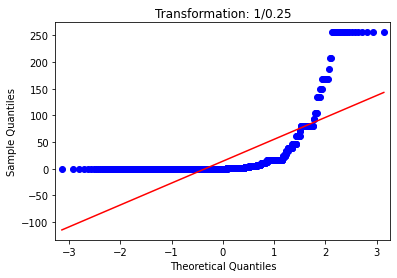

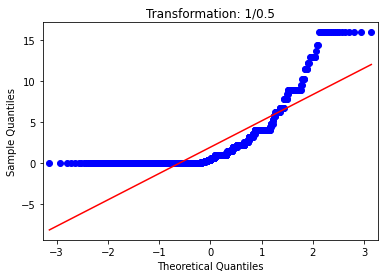

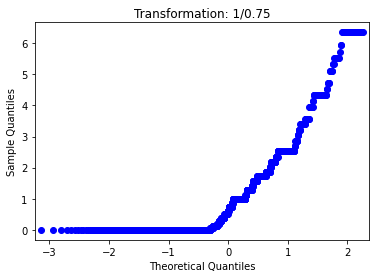

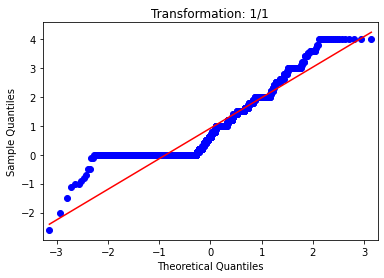

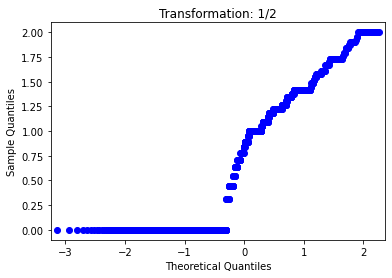

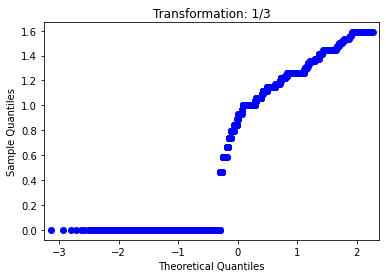

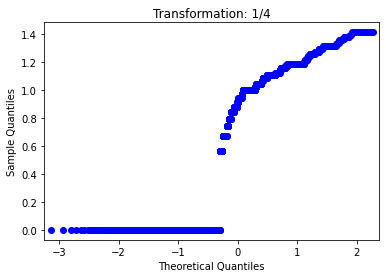

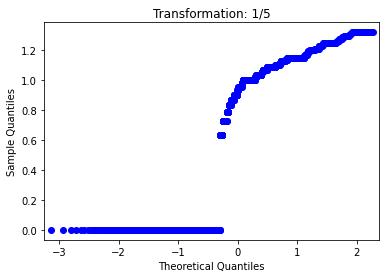

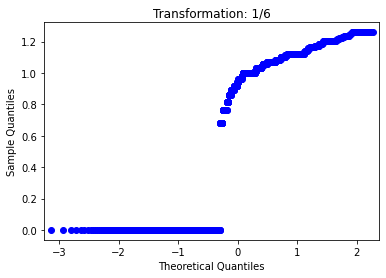

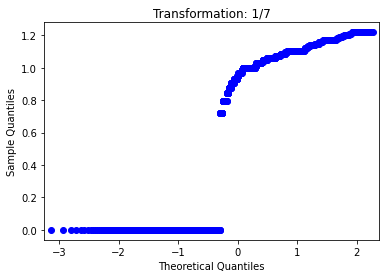

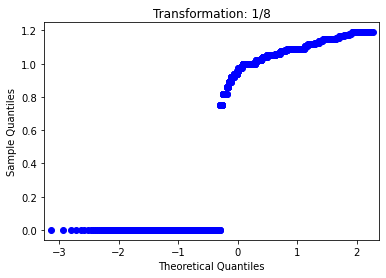

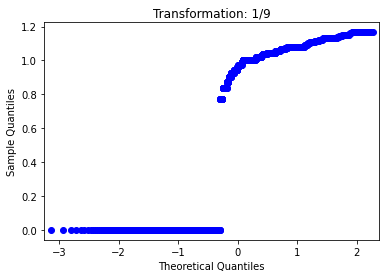

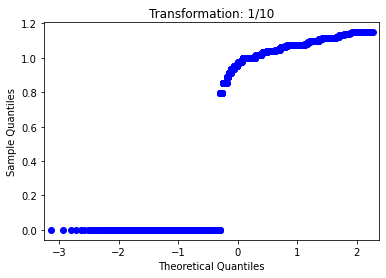

In [32]:
# Generate QQ plots
for i in [0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = heart_disease['oldpeak']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

#1/1

In [33]:
# Create the new transformed feature
heart_disease['resting bp s'] = heart_disease['resting bp s'].apply(lambda x: x**(1/2))
heart_disease['cholesterol'] = heart_disease['cholesterol'].apply(lambda x: x**(4/3))

In [34]:
heart_disease.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,11.832160,1910.720326,0,0,172,0,0.0,1,0
1,49,0,3,12.649111,1016.318911,0,0,156,0,1.0,2,1
2,37,1,2,11.401754,1858.012283,0,1,98,0,0.0,1,0
3,48,0,4,11.747340,1280.024742,0,0,108,1,1.5,2,1
4,54,1,3,12.247449,1130.783550,0,0,122,0,0.0,1,0


## Sharang's Analysis

In [35]:
import copy
heart_disease_truncated = copy.deepcopy(heart_disease)
del heart_disease_truncated['resting bp s']
del heart_disease_truncated['resting ecg']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

X = heart_disease.iloc[:, :-1].values
y = heart_disease.iloc[:, -1].values

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X,y,test_size = 0.4, random_state = 1)
X_val_full, X_test_full, y_val_full, y_test_full = train_test_split(X_test_full,y_test_full,test_size = 0.5, random_state = 1)


sc = StandardScaler()
X_train_full = sc.fit_transform(X_train_full)
X_test_full = sc.transform(X_test_full)
X_val_full = sc.transform(X_val_full)

with open(r"train_features.pickle", "wb") as output_file:
    pickle.dump(X_train_full, output_file)
with open(r"test_features.pickle", "wb") as output_file:
    pickle.dump(X_test_full, output_file)
with open(r"val_features.pickle", "wb") as output_file:
    pickle.dump(X_val_full, output_file)

with open(r"train_labels.pickle", "wb") as output_file:
    pickle.dump(y_train_full, output_file)
with open(r"test_labels.pickle", "wb") as output_file:
    pickle.dump(y_test_full, output_file)
with open(r"val_labels.pickle", "wb") as output_file:
    pickle.dump(y_val_full, output_file)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

X = heart_disease_truncated.iloc[:, :-1].values
y = heart_disease_truncated.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 1)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size = 0.5, random_state = 1)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

with open(r"train_features_truncated.pickle", "wb") as output_file:
    pickle.dump(X_train, output_file)
with open(r"test_features_truncated.pickle", "wb") as output_file:
    pickle.dump(X_test, output_file)
with open(r"val_features_truncated.pickle", "wb") as output_file:
    pickle.dump(X_val, output_file)

with open(r"train_labels_truncated.pickle", "wb") as output_file:
    pickle.dump(y_train, output_file)
with open(r"test_labels_truncated.pickle", "wb") as output_file:
    pickle.dump(y_test, output_file)
with open(r"val_labels_truncated.pickle", "wb") as output_file:
    pickle.dump(y_val, output_file)


In [74]:
#import pickle

#with open(r"train_features.pickle", "rb") as input_file:
#    X_train = pickle.load(input_file)

In [39]:
import joblib
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Hyperparameter tuning

In [40]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

## Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

## Full Feature Set

In [70]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(X_train_full, y_train_full)

print_results(cv)

BEST PARAMS: {'C': 1}

0.812 (+/-0.048) for {'C': 0.001}
0.825 (+/-0.037) for {'C': 0.01}
0.829 (+/-0.037) for {'C': 0.1}
0.83 (+/-0.043) for {'C': 1}
0.829 (+/-0.039) for {'C': 10}
0.829 (+/-0.039) for {'C': 100}
0.829 (+/-0.039) for {'C': 1000}


## Truncated Feature Set

In [71]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'C': 0.1}

0.822 (+/-0.046) for {'C': 0.001}
0.832 (+/-0.029) for {'C': 0.01}
0.836 (+/-0.045) for {'C': 0.1}
0.833 (+/-0.042) for {'C': 1}
0.833 (+/-0.042) for {'C': 10}
0.833 (+/-0.042) for {'C': 100}
0.833 (+/-0.042) for {'C': 1000}


In [72]:
cv.best_estimator_

LogisticRegression(C=0.1)

In [73]:
joblib.dump(cv.best_estimator_, 'LR_model.pkl')

['LR_model.pkl']

## Inference 

Using Logistic Regression, the best accuracy is obtained using the truncated feature set, with hyperparamerer C = 0.1

## Support Vector Machine

In [80]:
from sklearn.svm import SVC

## Full feature set

In [81]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(X_train_full, y_train_full)

print_results(cv)

BEST PARAMS: {'C': 10, 'kernel': 'rbf'}

0.842 (+/-0.041) for {'C': 0.1, 'kernel': 'linear'}
0.83 (+/-0.052) for {'C': 0.1, 'kernel': 'rbf'}
0.84 (+/-0.039) for {'C': 1, 'kernel': 'linear'}
0.846 (+/-0.05) for {'C': 1, 'kernel': 'rbf'}
0.842 (+/-0.039) for {'C': 10, 'kernel': 'linear'}
0.846 (+/-0.045) for {'C': 10, 'kernel': 'rbf'}


## Truncated feature set

In [82]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'rbf'}

0.836 (+/-0.038) for {'C': 0.1, 'kernel': 'linear'}
0.836 (+/-0.042) for {'C': 0.1, 'kernel': 'rbf'}
0.839 (+/-0.039) for {'C': 1, 'kernel': 'linear'}
0.844 (+/-0.058) for {'C': 1, 'kernel': 'rbf'}
0.84 (+/-0.037) for {'C': 10, 'kernel': 'linear'}
0.838 (+/-0.034) for {'C': 10, 'kernel': 'rbf'}


In [78]:
cv.best_estimator_

SVC(C=1)

In [79]:
joblib.dump(cv.best_estimator_, 'SVM_model.pkl')

['SVM_model.pkl']

## Inference 

Using Support Vector Machine, the best accuracy is obtained using the truncated feature set, with hyperparamerer C = 1 and kernel = rbf

## Multi Layer Perceptron

In [83]:
from sklearn.neural_network import MLPClassifier

## Full feature set

In [84]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(X_train_full, y_train_full)

print_results(cv)

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}

0.831 (+/-0.032) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.822 (+/-0.045) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.828 (+/-0.05) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.849 (+/-0.032) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.842 (+/-0.034) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.846 (+/-0.032) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.836 (+/-0.046) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.836 (+/-0.038) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.85 (+/-0.049) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learnin

## Truncated feature set

In [85]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}

0.828 (+/-0.029) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.828 (+/-0.052) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.83 (+/-0.05) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.846 (+/-0.025) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.842 (+/-0.033) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.843 (+/-0.043) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.842 (+/-0.036) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.843 (+/-0.044) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.847 (+/-0.041) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning

In [88]:
cv.best_estimator_

MLPClassifier(activation='tanh', hidden_layer_sizes=(50,),
              learning_rate='adaptive')

In [89]:
joblib.dump(cv.best_estimator_, 'MLP_model.pkl')

['MLP_model.pkl']

## Inference 

Using Multi Layer Perceptron, the best accuracy is obtained using the truncated feature set, with hyperparamerer 'activation' = 'tanh', 'hidden_layer_sizes' = (50,), 'learning_rate' = 'adaptive'



## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

## Full feature set

In [50]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train_full, y_train_full)

print_results(cv)

BEST PARAMS: {'max_depth': 16, 'n_estimators': 250}

0.801 (+/-0.079) for {'max_depth': 2, 'n_estimators': 5}
0.829 (+/-0.038) for {'max_depth': 2, 'n_estimators': 50}
0.839 (+/-0.02) for {'max_depth': 2, 'n_estimators': 250}
0.826 (+/-0.042) for {'max_depth': 4, 'n_estimators': 5}
0.842 (+/-0.02) for {'max_depth': 4, 'n_estimators': 50}
0.843 (+/-0.034) for {'max_depth': 4, 'n_estimators': 250}
0.832 (+/-0.058) for {'max_depth': 8, 'n_estimators': 5}
0.868 (+/-0.017) for {'max_depth': 8, 'n_estimators': 50}
0.868 (+/-0.023) for {'max_depth': 8, 'n_estimators': 250}
0.836 (+/-0.047) for {'max_depth': 16, 'n_estimators': 5}
0.871 (+/-0.038) for {'max_depth': 16, 'n_estimators': 50}
0.875 (+/-0.038) for {'max_depth': 16, 'n_estimators': 250}
0.854 (+/-0.04) for {'max_depth': 32, 'n_estimators': 5}
0.871 (+/-0.034) for {'max_depth': 32, 'n_estimators': 50}
0.871 (+/-0.037) for {'max_depth': 32, 'n_estimators': 250}
0.835 (+/-0.069) for {'max_depth': None, 'n_estimators': 5}
0.874 (+/-0.02

In [51]:
cv.best_estimator_

RandomForestClassifier(max_depth=16, n_estimators=250)

## Truncated feature set

In [52]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'max_depth': 16, 'n_estimators': 250}

0.814 (+/-0.043) for {'max_depth': 2, 'n_estimators': 5}
0.832 (+/-0.027) for {'max_depth': 2, 'n_estimators': 50}
0.838 (+/-0.033) for {'max_depth': 2, 'n_estimators': 250}
0.822 (+/-0.046) for {'max_depth': 4, 'n_estimators': 5}
0.838 (+/-0.028) for {'max_depth': 4, 'n_estimators': 50}
0.845 (+/-0.039) for {'max_depth': 4, 'n_estimators': 250}
0.857 (+/-0.059) for {'max_depth': 8, 'n_estimators': 5}
0.87 (+/-0.04) for {'max_depth': 8, 'n_estimators': 50}
0.868 (+/-0.029) for {'max_depth': 8, 'n_estimators': 250}
0.861 (+/-0.043) for {'max_depth': 16, 'n_estimators': 5}
0.871 (+/-0.021) for {'max_depth': 16, 'n_estimators': 50}
0.877 (+/-0.025) for {'max_depth': 16, 'n_estimators': 250}
0.839 (+/-0.064) for {'max_depth': 32, 'n_estimators': 5}
0.871 (+/-0.037) for {'max_depth': 32, 'n_estimators': 50}
0.874 (+/-0.02) for {'max_depth': 32, 'n_estimators': 250}
0.851 (+/-0.053) for {'max_depth': None, 'n_estimators': 5}
0.871 (+/-0.01

In [54]:
cv.best_estimator_

RandomForestClassifier(max_depth=16, n_estimators=250)

In [55]:
joblib.dump(cv.best_estimator_, 'RF_model.pkl')

['RF_model.pkl']

## Inference 

Using Random Forests, the best accuracy is obtained using the truncated dataset with 'max_depth' = 16, 'n_estimators' = 250

## Gradient boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

## Full feature set

In [45]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 100, 150, 200, 250, 500],
    'max_depth': [1, 2, 3, 4, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(X_train_full, y_train_full)

print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500}

0.52 (+/-0.006) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.787 (+/-0.054) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.787 (+/-0.054) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100}
0.8 (+/-0.034) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 150}
0.824 (+/-0.048) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200}
0.835 (+/-0.048) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.838 (+/-0.035) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.766 (+/-0.03) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 5}
0.794 (+/-0.052) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50}
0.817 (+/-0.036) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}
0.825 (+/-0.038) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 150}
0.832 (+/-0.05) for {'learning_ra

limit_output extension: Maximum message size of 10000 exceeded with 19662 characters

best accuracy : 0.877 (+/-0.044) for {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500}

## Truncated feature set

In [46]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 100, 150, 200, 250, 500],
    'max_depth': [1, 2, 3, 4, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'learning_rate': 1, 'max_depth': 9, 'n_estimators': 50}

0.52 (+/-0.006) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.787 (+/-0.054) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.787 (+/-0.054) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100}
0.8 (+/-0.034) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 150}
0.824 (+/-0.048) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200}
0.835 (+/-0.048) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.838 (+/-0.035) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.766 (+/-0.03) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 5}
0.794 (+/-0.052) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50}
0.812 (+/-0.05) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}
0.825 (+/-0.038) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 150}
0.832 (+/-0.051) for {'learning_rate':

limit_output extension: Maximum message size of 10000 exceeded with 19650 characters

BEST PARAMS: {'learning_rate': 1, 'max_depth': 9, 'n_estimators': 50}

In [47]:
cv.best_estimator_

GradientBoostingClassifier(learning_rate=1, max_depth=9, n_estimators=50)

In [48]:
joblib.dump(cv.best_estimator_, 'GBC_model.pkl')

['GBC_model.pkl']

## Inference 

Best accuracy obtained with full dataset with 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500 or truncated dataset with 'learning_rate': 1, 'max_depth': 9, 'n_estimators': 50

### Compare model results and final model selection

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

In [60]:
models = {}

for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GBC']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [61]:
models

{'LR': LogisticRegression(C=0.1),
 'SVM': SVC(C=1),
 'MLP': MLPClassifier(activation='tanh', hidden_layer_sizes=(50,),
               learning_rate='adaptive'),
 'RF': RandomForestClassifier(max_depth=16, n_estimators=250),
 'GBC': GradientBoostingClassifier(learning_rate=1, max_depth=9, n_estimators=50)}

### Evaluate models on the validation set

In [62]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [64]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_val, y_val)

LR -- Accuracy: 0.849 / Precision: 0.841 / Recall: 0.881 / Latency: 0.4ms
SVM -- Accuracy: 0.87 / Precision: 0.863 / Recall: 0.897 / Latency: 2.6ms
MLP -- Accuracy: 0.866 / Precision: 0.856 / Recall: 0.897 / Latency: 0.9ms
RF -- Accuracy: 0.933 / Precision: 0.917 / Recall: 0.96 / Latency: 47.5ms
GBC -- Accuracy: 0.903 / Precision: 0.893 / Recall: 0.929 / Latency: 2.0ms


### Evaluate best model on test set

In [66]:
evaluate_model('Random Forest', models['RF'], X_test, y_test)

Random Forest -- Accuracy: 0.895 / Precision: 0.921 / Recall: 0.886 / Latency: 49.1ms


In [67]:
evaluate_model('Gradient Boost', models['GBC'], X_test, y_test)

Gradient Boost -- Accuracy: 0.861 / Precision: 0.89 / Recall: 0.856 / Latency: 3.0ms


In [69]:
evaluate_model('Support Vector Machine', models['SVM'], X_test, y_test)

Support Vector Machine -- Accuracy: 0.824 / Precision: 0.857 / Recall: 0.818 / Latency: 3.3ms


In [68]:
evaluate_model('Multi Level Perceptron', models['MLP'], X_test, y_test)

Multi Level Perceptron -- Accuracy: 0.819 / Precision: 0.868 / Recall: 0.795 / Latency: 2.3ms


## Test on 80:20 split

In [70]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = heart_disease_truncated.iloc[:, :-1].values
y = heart_disease_truncated.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)


model = RandomForestClassifier(random_state=1, max_depth=16, n_estimators=250)# get instance of model
model.fit(x_train, y_train) # Train/Fit model 

y_pred = model.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred)) # output accuracy

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       111
           1       0.95      0.95      0.95       127

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



## Confusion Matrix

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[105   6]
 [  6 121]]


0.9495798319327731

105 are the True Positives in our test data.

There are 6 type 1 error (False Positives)- predicted positive and it’s false.

There are 6 type 2 error (False Negatives)- predicted negative and it’s false.

121 are the True Negatives in our test data.

In [72]:
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.11175
Feature: 1, Score: 0.04363
Feature: 2, Score: 0.13102
Feature: 3, Score: 0.13294
Feature: 4, Score: 0.02103
Feature: 5, Score: 0.15787
Feature: 6, Score: 0.07946
Feature: 7, Score: 0.12398
Feature: 8, Score: 0.19831


<AxesSubplot:>

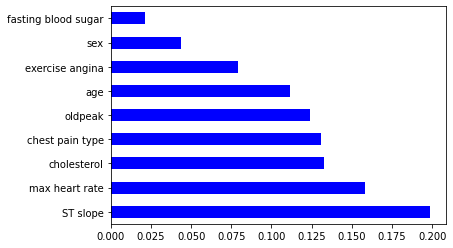

In [73]:
import pandas as pd
index= heart_disease_truncated.columns[:-1]
importance = pd.Series(model.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

#### The top 4 significant features in the random forest model are

St slope, 
max heart rate, 
chest pain type, 
cholestrol 

# Conclusion

Random Forest is the best model for our use case with parameters max_depth=16, n_estimators=250 on the truncated model with an accuracy score of 95%

# Sarah's Analysis

In [130]:
# Filtering data by POSITIVE Heart Disease patient
pos_data = heart_disease[heart_disease['target']==1]
pos_data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.0
mean,56.014308,0.888712,3.639110,11.541787,1214.344037,0.297297,0.758347,129.755167,0.608903,1.316375,1.915739,1.0
std,8.558795,0.314738,0.754053,0.909183,795.368689,0.457432,0.868109,23.660426,0.488384,1.137828,0.518041,0.0
min,31.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,1.0
25%,51.000000,1.000000,4.000000,10.954451,631.675540,0.000000,0.000000,113.000000,0.000000,0.100000,2.000000,1.0
50%,57.000000,1.000000,4.000000,11.489125,1376.611053,0.000000,0.000000,128.000000,1.000000,1.200000,2.000000,1.0
75%,62.000000,1.000000,4.000000,12.041595,1779.647889,1.000000,2.000000,147.000000,1.000000,2.000000,2.000000,1.0
max,74.000000,1.000000,4.000000,13.416408,3039.238397,1.000000,2.000000,188.000000,1.000000,4.000000,3.000000,1.0


In [131]:
# Filtering data by NEGATIVE Heart Disease patient
neg_data = heart_disease[heart_disease['target']==0]
neg_data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.0
mean,51.115865,0.623886,2.777184,11.369455,1448.118484,0.119430,0.631016,150.798574,0.139037,0.463993,1.297683,0.0
std,9.471524,0.484842,0.909423,0.715414,509.576325,0.324583,0.868723,22.526502,0.346294,0.729693,0.536668,0.0
min,28.000000,0.000000,1.000000,8.944272,0.000000,0.000000,0.000000,69.000000,0.000000,-1.100000,1.000000,0.0
25%,44.000000,0.000000,2.000000,10.954451,1177.410967,0.000000,0.000000,137.000000,0.000000,0.000000,1.000000,0.0
50%,51.000000,1.000000,3.000000,11.401754,1425.555007,0.000000,0.000000,154.000000,0.000000,0.000000,1.000000,0.0
75%,57.000000,1.000000,4.000000,11.832160,1727.877935,0.000000,2.000000,169.000000,0.000000,0.800000,2.000000,0.0
max,74.000000,1.000000,4.000000,13.416408,3039.238397,1.000000,2.000000,188.000000,1.000000,4.000000,3.000000,0.0


In [132]:
print("(Positive Patients ST depression): " + str(pos_data['oldpeak'].mean()))
print("(Negative Patients ST depression): " + str(neg_data['oldpeak'].mean()))

(Positive Patients ST depression): 1.3163751987281398
(Negative Patients ST depression): 0.4639928698752228


In [133]:
print("(Positive Patients thalach): " + str(pos_data['max heart rate'].mean()))
print("(Negative Patients thalach): " + str(neg_data['max heart rate'].mean()))

(Positive Patients thalach): 129.75516693163752
(Negative Patients thalach): 150.79857397504458


## Machine Learning + Predictive Analytics

In [134]:
X = heart_disease.iloc[:, :-1].values
y = heart_disease.iloc[:, -1].values

In [135]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [136]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Model 1: Logistic Regression

In [137]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       111
           1       0.86      0.83      0.85       127

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



### Model 2: K-NN (K-Nearest Neighbors)

In [138]:
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       111
           1       0.88      0.89      0.88       127

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238



### Model 3: SVM (Support Vector Machine)

In [139]:
from sklearn.metrics import classification_report 
from sklearn.svm import SVC

model3 = SVC(random_state=1) # get instance of model
model3.fit(x_train, y_train) # Train/Fit model 

y_pred3 = model3.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       111
           1       0.92      0.92      0.92       127

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



### Model 4: Naives Bayes Classifier

In [140]:
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() # get instance of model
model4.fit(x_train, y_train) # Train/Fit model 

y_pred4 = model4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       111
           1       0.89      0.86      0.88       127

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238



### Model 5: Decision Trees

In [141]:
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state=1) # get instance of model
model5.fit(x_train, y_train) # Train/Fit model 

y_pred5 = model5.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred5)) # output accuracy

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       111
           1       0.97      0.83      0.90       127

    accuracy                           0.90       238
   macro avg       0.90      0.90      0.90       238
weighted avg       0.91      0.90      0.90       238



### Model 6: Random Forest

In [142]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       111
           1       0.95      0.94      0.95       127

    accuracy                           0.95       238
   macro avg       0.94      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



## This for dataset without the 2 features



In [143]:
X1 = heart_disease_without2f.iloc[:, :-1].values
y1 = heart_disease_without2f.iloc[:, -1].values

In [144]:
# this for dataset without the 2 features

from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(X1,y1,test_size = 0.2, random_state = 1)

In [145]:
# this for dataset without the 2 features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

### Model 1: Logistic Regression

In [146]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x1_train, y1_train) # Train/Fit model 

y1_pred1 = model1.predict(x1_test) # get y predictions
print(classification_report(y1_test, y1_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       111
           1       0.87      0.83      0.85       127

    accuracy                           0.84       238
   macro avg       0.84      0.85      0.84       238
weighted avg       0.85      0.84      0.84       238



### Model 2: K-NN (K-Nearest Neighbors)

In [147]:
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # get instance of model
model2.fit(x1_train, y1_train) # Train/Fit model 

y1_pred2 = model2.predict(x1_test) # get y predictions
print(classification_report(y1_test, y1_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       111
           1       0.92      0.88      0.90       127

    accuracy                           0.89       238
   macro avg       0.89      0.90      0.89       238
weighted avg       0.90      0.89      0.90       238



### Model 3: SVM (Support Vector Machine)

In [148]:
from sklearn.metrics import classification_report 
from sklearn.svm import SVC

model3 = SVC(random_state=1) # get instance of model
model3.fit(x1_train, y1_train) # Train/Fit model 

y1_pred3 = model3.predict(x1_test) # get y predictions
print(classification_report(y1_test, y1_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       111
           1       0.92      0.90      0.91       127

    accuracy                           0.90       238
   macro avg       0.90      0.90      0.90       238
weighted avg       0.90      0.90      0.90       238



### Model 4: Naives Bayes Classifier

In [149]:
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() # get instance of model
model4.fit(x1_train, y1_train) # Train/Fit model 

y1_pred4 = model4.predict(x1_test) # get y predictions
print(classification_report(y1_test, y1_pred4)) # output accuracy

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       111
           1       0.89      0.87      0.88       127

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238



### Model 5: Decision Trees

In [150]:
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state=1) # get instance of model
model5.fit(x1_train, y1_train) # Train/Fit model 

y1_pred5 = model5.predict(x1_test) # get y predictions
print(classification_report(y1_test, y1_pred5)) # output accuracy

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       111
           1       0.96      0.85      0.90       127

    accuracy                           0.90       238
   macro avg       0.90      0.90      0.90       238
weighted avg       0.91      0.90      0.90       238



### Model 6: Random Forest

In [151]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x1_train, y1_train) # Train/Fit model 

y1_pred6 = model6.predict(x1_test) # get y predictions
print(classification_report(y1_test, y1_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       111
           1       0.95      0.96      0.96       127

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



### Confusion Matrix

In [152]:
# cnfusion matrix for the random forest model < dataset without 2 features
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y1_test, y1_pred6)
print(cm)
accuracy_score(y1_test, y1_pred6)

[[105   6]
 [  5 122]]


0.9537815126050421

##  Confusion Matrix for random Forest
105 the TP in our test data 

6 &5 the number of errors

There are 6 type 1 error (False Positives)-  predicted positive and it’s false.

There are 5 type 2 error (False Negatives)-  predicted negative and it’s false.

122 the TN in our test data 



In [153]:
importance = model6.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.11282
Feature: 1, Score: 0.04405
Feature: 2, Score: 0.13611
Feature: 3, Score: 0.13165
Feature: 4, Score: 0.02113
Feature: 5, Score: 0.15820
Feature: 6, Score: 0.07844
Feature: 7, Score: 0.12495
Feature: 8, Score: 0.19265


<AxesSubplot:>

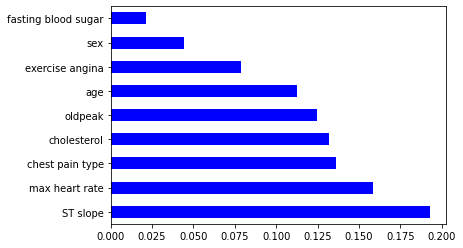

In [154]:
index= heart_disease_without2f.columns[:-1]
importance = pd.Series(model6.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

#### The top 4 significant features in the random forest model are

St slope, 
max heart rate, 
chest pain type, 
cholestrol 